In [3]:
import numpy as np
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('data.csv',na_values = '?')
#對資料中的'?'進行NAN處理
test = pd.read_csv('test.csv',na_values = '?')
df = data.append(test) #合併

C:\Users\User\AppData\Local\Temp\ipykernel_24124\2541535838.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = data.append(test) #合併


In [5]:
df.reset_index(inplace=True, drop=True)
#重新排列序號
df.dropna(axis=0, how='any', inplace=True)  #處理缺失值
df.describe(include='all')
#print(len(df)) #刪除缺失值後的資料筆數
df = df.drop(columns=['fnlwgt','education-num','relationship','capital-gain','capital-loss','native-country'])
#資料預處理刪除不需要的欄位

In [6]:
pd.get_dummies(df['workclass']) #one-hot處理
onehot_encoding_workclass = pd.get_dummies(df['workclass'], prefix = 'workclass')

In [7]:
df = pd.concat([onehot_encoding_workclass, df], axis=1)

In [8]:
pd.get_dummies(df['race'])
onehot_encoding_race = pd.get_dummies(df['race'], prefix = 'race')

In [9]:
df = pd.concat([onehot_encoding_race, df], axis=1)

In [10]:
educationMapping = {            #ordinal排序
              'Doctorate': 16,
              'Masters': 15,
              'Bachelors': 14,
              'Some-college': 13,
              'Assoc-voc': 12,
              'Assoc-acdm': 11,
              'Prof-school': 10,
              'HS-grad': 9,
              '12th': 8,
              '11th': 7,
              '10th': 6,
              '9th': 5,
              '7th-8th': 4,
              '5th-6th': 3,
              '1st-4th': 2,
              'Preschool': 1
}
df['education'] = df['education'].map(educationMapping)

In [11]:
maritalstatusMapping = {            #維度過多因此這裡名目型直接做排序
              'Married-civ-spouse': 6,
              'Divorced': 5,
              'Never-married': 4,
              'Separated': 3,
              'Widowed': 2,
              'Married-spouse-absent': 1,
              'Married-AF-spouse': 0
}
df['marital-status'] = df['marital-status'].map(maritalstatusMapping)

In [12]:
occupationMapping = {            #維度過多因此這裡名目型直接做排序
              'Prof-specialty': 13,
              'Craft-repair': 12,
              'Exec-managerial': 11,
              'Adm-clerical': 10,
              'Sales': 9,
              'Other-service': 8,
              'Machine-op-inspct': 7,
              'Transport-moving': 6,
              'Handlers-cleaners': 5,
              'Farming-fishing': 4,
              'Tech-support': 3,
              'Protective-serv': 2,
              'Priv-house-serv': 1,
              'Armed-Forces': 0
}
df['occupation'] = df['occupation'].map(occupationMapping)

In [13]:
sexMapping = {            #二元類別也直接做排序
              'Male': 1,
              'Female': 0
}
df['sex'] = df['sex'].map(sexMapping)

In [14]:
incomeMapping = {            #class attribute
              '>50K': 1,
              '>50K.' : 1,
              '<=50K': 0,
              '<=50K.' : 0
}
df['class_annual_income'] = df['class_annual_income'].map(incomeMapping)

<Figure size 1500x1000 with 0 Axes>

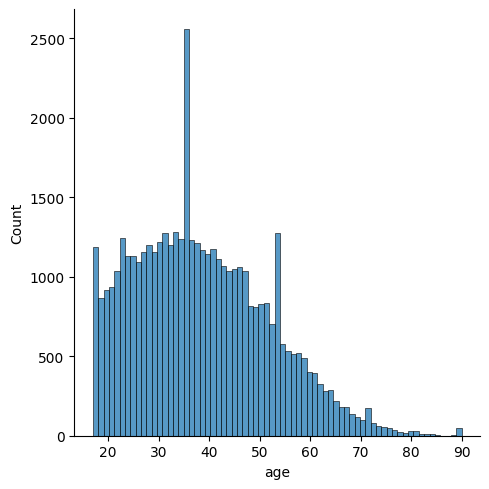

In [15]:
plt.figure(figsize=(15,10))  #連續型屬性數據圖像化
sns.displot(df['age'])
plt.show()

In [16]:
ageList = df['age'].tolist()  #將年齡分成三個區間
bins = [18,36,64,90]
age_cut = pd.cut(ageList, bins, labels=['young_adult', 'middle_age', 'senior'])
df['age'] = age_cut

In [17]:
ageMapping = {
              'young_adult': 3,
              'middle_age': 2,
              'senior': 1
}
df['age'] = df['age'].map(ageMapping)

<Figure size 1500x1000 with 0 Axes>

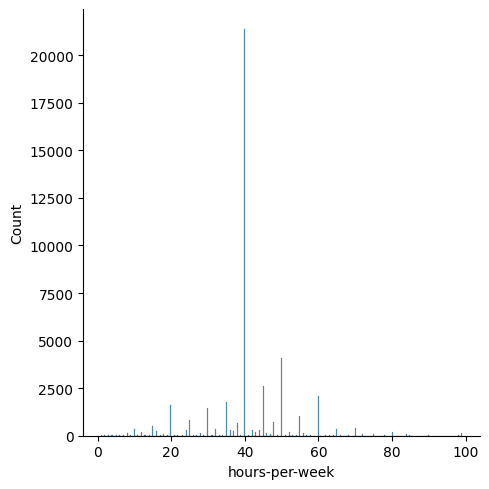

In [18]:
plt.figure(figsize=(15,10))  #連續型屬性數據圖像化
sns.displot(df['hours-per-week'])
plt.show()

In [19]:
hoursList = df['hours-per-week'].tolist()
bins = [0,39.5,40.5,100]
hours_cut = pd.cut(hoursList, bins, labels=['lessthan40', '40', 'morethan40'])
df['hours-per-week'] = hours_cut

In [20]:
hoursMapping = {
              'lessthan40': 3,
              '40': 2,
              'morethan40': 1
}
df['hours-per-week'] = df['hours-per-week'].map(hoursMapping)

In [21]:
df = df.drop(columns=['race','workclass'])

In [22]:
df

,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,age,education,marital-status,occupation,sex,hours-per-week,class_annual_income
0,0,0,0,0,1,0,0,0,0,0,1,0,2,14,4,10,1,2,0
1,0,0,0,0,1,0,0,0,0,1,0,0,2,14,6,11,1,3,0
2,0,0,0,0,1,0,0,1,0,0,0,0,2,9,5,5,1,2,0
3,0,0,1,0,0,0,0,1,0,0,0,0,2,7,6,5,1,2,0
4,0,0,1,0,0,0,0,1,0,0,0,0,3,14,6,13,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,0,0,0,0,1,0,0,1,0,0,0,0,3,14,4,13,1,2,0
48837,0,0,0,0,1,0,0,1,0,0,0,0,2,14,5,13,0,3,0
48839,0,0,0,0,1,0,0,1,0,0,0,0,2,14,6,13,1,1,0
48840,0,1,0,0,0,0,0,1,0,0,0,0,2,14,5,10,1,2,0


In [23]:
all_of_columns = list(df.columns)
features = all_of_columns[:-1]
target = df['class_annual_income']
feature_df = df[features]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, target, test_size=0.2)
print(X_train.shape,y_train.shape, X_test.shape, y_test.shape)
clf=tree.DecisionTreeClassifier(criterion='entropy', max_depth=8, ccp_alpha=0.001).fit(X_train,y_train)

(36177, 18) (36177,) (9045, 18) (9045,)


In [25]:
clf.get_params()

{'ccp_alpha': 0.001,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [26]:
predictions = clf.predict(X_test)
feature_names = feature_df.columns

<AxesSubplot:>

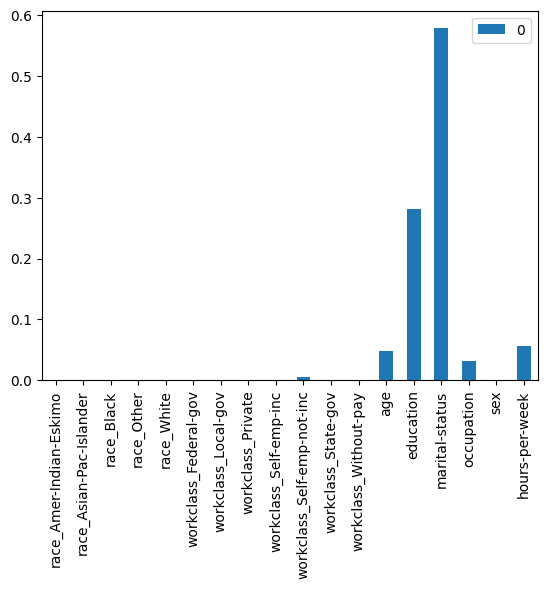

In [27]:
#檢視重要程度
feature_importance = pd.DataFrame(clf.feature_importances_,index = feature_names)
feature_importance.plot(kind='bar')

In [28]:
clf.score(X_train,y_train)  #訓練集準確度

0.8261049838295049

In [29]:
clf.score(X_test,y_test)    #測試集準確度

0.8271973466003317

In [30]:
df1=df['class_annual_income']
xlable=df.drop(['class_annual_income'],axis=1)

In [31]:
x=xlable
y=df1

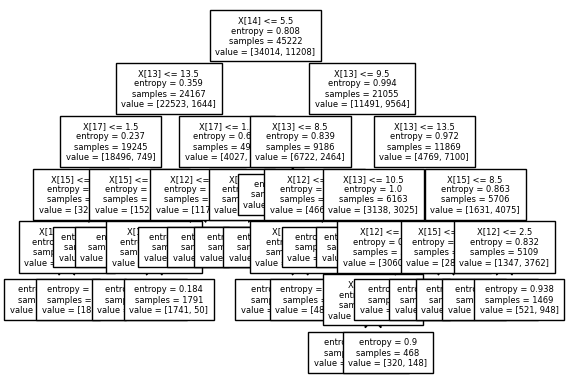

In [32]:
clf.fit(x,y)
plt.figsize=(12,12)
tree.plot_tree(clf, fontsize=6)
plt.show()

In [33]:
error = 0
for i, v in enumerate(predictions):
    if v!= y_test.values[i]:
        error+=1
print(error)  #測試結果的錯誤數

answer = y_test.values

clf_prediction = []
for j in predictions:
    clf_prediction.append('%d' % j)
    
clf_prediction = np.array(clf_prediction)

1563


In [34]:
y_answer = pd.Series(answer, name='answer')
y_prediction = pd.Series(clf_prediction, name='predict')

#將正確結果和預測結果合併
result = pd.DataFrame(y_answer).join(y_prediction)

test_result = 'Adult.test_result.xlsx'
  
#匯入excel
result.to_excel(test_result)